# Wstęp do uczenia maszynowego
##  Praca domowa nr 2
#### Jakub Piwko, Malwina Wojewoda
***
***
***

### Pakiety

In [14]:
import pandas as pd
import plotly.express as px
import numpy as np
import sklearn 
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib
import warnings
warnings.filterwarnings('ignore')
np.random.seed(23)
from sklearn.model_selection import train_test_split
from sklearn import metrics

### Wczytanie i analiza danych

Zbiór danych opisuje transakcje zarejestrowane na stronie allegro.pl w ciągu jednego pełnego dnia 3 kwietnia 2016r. 
Zmienna, którą przewidujemy: cena

In [15]:
df = pd.read_csv('allegro-api-transactions.csv')
df.head()

,lp,date,item_id,categories,pay_option_on_delivery,pay_option_transfer,seller,price,it_is_allegro_standard,it_quantity,it_is_brand_zone,it_seller_rating,it_location,main_category
0,0,2016-04-03 21:21:08,4753602474,"['Komputery', 'Dyski i napędy', 'Nośniki', 'No...",1,1,radzioch666,59.99,1,997,0,50177,Warszawa,Komputery
1,1,2016-04-03 15:35:26,4773181874,"['Odzież, Obuwie, Dodatki', 'Bielizna damska',...",1,1,InwestycjeNET,4.90,1,9288,0,12428,Warszawa,"Odzież, Obuwie, Dodatki"
2,2,2016-04-03 14:14:31,4781627074,"['Dom i Ogród', 'Budownictwo i Akcesoria', 'Śc...",1,1,otostyl_com,109.90,1,895,0,7389,Leszno,Dom i Ogród
3,3,2016-04-03 19:55:44,4783971474,"['Książki i Komiksy', 'Poradniki i albumy', 'Z...",1,1,Matfel1,18.50,0,971,0,15006,Wola Krzysztoporska,Książki i Komiksy
4,4,2016-04-03 18:05:54,4787908274,"['Odzież, Obuwie, Dodatki', 'Ślub i wesele', '...",1,1,PPHU_RICO,19.90,1,950,0,32975,BIAŁYSTOK,"Odzież, Obuwie, Dodatki"


### Podział na zbiór treningowy, testowy i walidacyjny

In [16]:
#do zignorowania na razie ten chunk

# df1['price'] = pd.cut(df1['price'], bins=[0, 150, 1000, np.inf], labels=[1, 2, 3])

# ydf = np.array(df1['price'])
# Xdf = df1.drop(['price'],axis=1)

#Wyróżnienie zbioru, na którym będziemy pracować i zbiory do walidacji
# X, X_val, y, y_val = train_test_split(
#     Xdf, ydf, stratify=ydf, test_size=0.3, random_state=100
# )

# #Wyróżnienie zbioru treningowego i testowego
# X_train, X_test, y_train, y_test = train_test_split(
#     X, y, stratify=y, test_size=0.3, random_state=100
# )

In [17]:
#Wyróżnienie zbioru, na którym będziemy pracować i zbioru do walidacji
X, X_valid = sklearn.model_selection.train_test_split(
    df,
    test_size=0.30, random_state=100)

#Wyróżnienie zbioru treningowego i testowego
X_train, X_test = sklearn.model_selection.train_test_split(
    X,
    test_size=0.30, random_state=100)

#### Analiza braków danych

In [18]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 205809 entries, 258810 to 414402
Data columns (total 14 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   lp                      205809 non-null  int64  
 1   date                    205809 non-null  object 
 2   item_id                 205809 non-null  int64  
 3   categories              205809 non-null  object 
 4   pay_option_on_delivery  205809 non-null  int64  
 5   pay_option_transfer     205809 non-null  int64  
 6   seller                  205809 non-null  object 
 7   price                   205809 non-null  float64
 8   it_is_allegro_standard  205809 non-null  int64  
 9   it_quantity             205809 non-null  int64  
 10  it_is_brand_zone        205809 non-null  int64  
 11  it_seller_rating        205809 non-null  int64  
 12  it_location             205809 non-null  object 
 13  main_category           205809 non-null  object 
dtypes: float64(1), 

W ramce danych nie wystąpują wartości None/Null, więc nie będziemy musieli zajmować się uzupełnianiem brakujących wartości.

#### Rozkłady zmiennych
Pomimo, że niektóre zmienne są typu *int* i *float*, to mogą to być zmienne dyskretne/kategoryczne. Sprawdźmy to zatem:

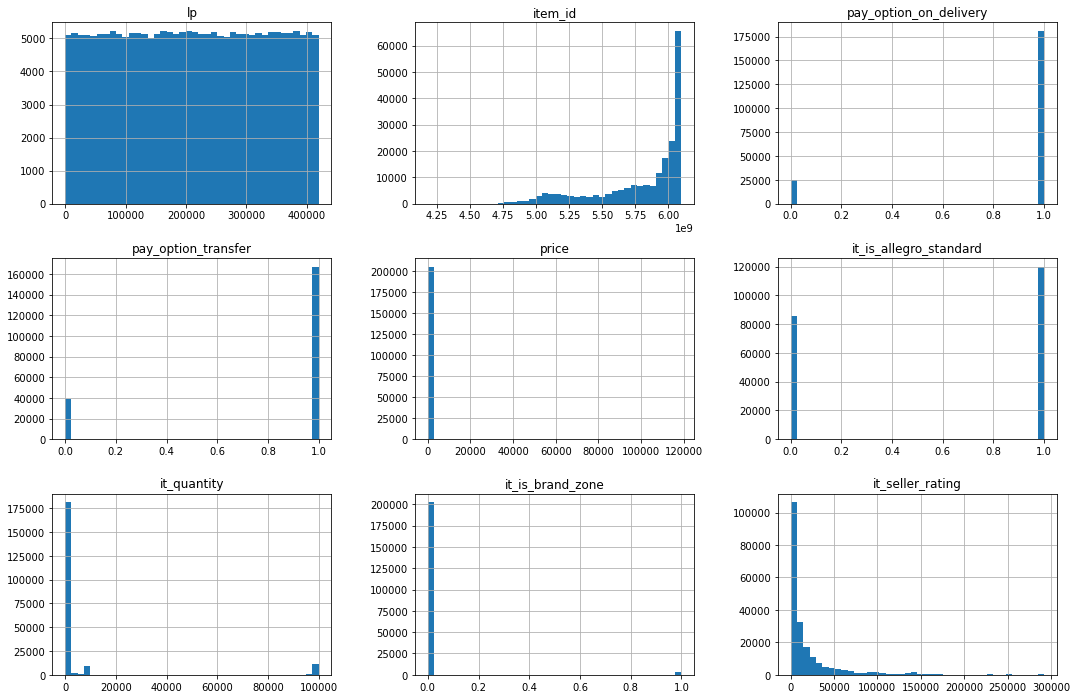

In [19]:
X_train.hist(figsize=(18, 12), bins=40)
plt.show()

Mimo, że z histogramu niektóre wielkości wyglądają na kategoryczne lepiej upewnic się korzystając ze zliczenia występujących wartości:

In [20]:
X_train['pay_option_on_delivery'].value_counts()

1    180652
0     25157
Name: pay_option_on_delivery, dtype: int64

In [21]:
X_train['pay_option_transfer'].value_counts()

1    167212
0     38597
Name: pay_option_transfer, dtype: int64

In [22]:
X_train['it_is_allegro_standard'].value_counts()

1    120044
0     85765
Name: it_is_allegro_standard, dtype: int64

In [23]:
X_train['it_is_brand_zone'].value_counts()

0    202406
1      3403
Name: it_is_brand_zone, dtype: int64

In [24]:
X_train['it_quantity'].value_counts()

0        31216
1         5532
2         4191
3         3554
4         3345
         ...  
2882         1
2905         1
48642        1
49997        1
96822        1
Name: it_quantity, Length: 6241, dtype: int64

Widać więc, że zmienne *pay_option_on_delivery*, *pay_option_transfer*, *it_is_allegro_standard*, *it_is_brand_zone* są kategoryczne z dwiema wartościami: 0 i 1. Natomiast zmienna *it_quantity* okazała się być ciągła.

### Zamiana zmiennych ciągłych na kategoryczne

Zmienna *item_id* to numer identyfikujący konketną rzecz, który nie ma żadnego wpływu na nasza zmienną celu, dlatego można usunąć tę kolumnę. Do zmiany pozostają zatem tylko zmienne *it_quantity*,  *it_seller_rating* oraz *price*.

In [29]:
X_train.drop(['item_id', 'lp'],  axis=1, inplace = True)

####  `it_guantity`

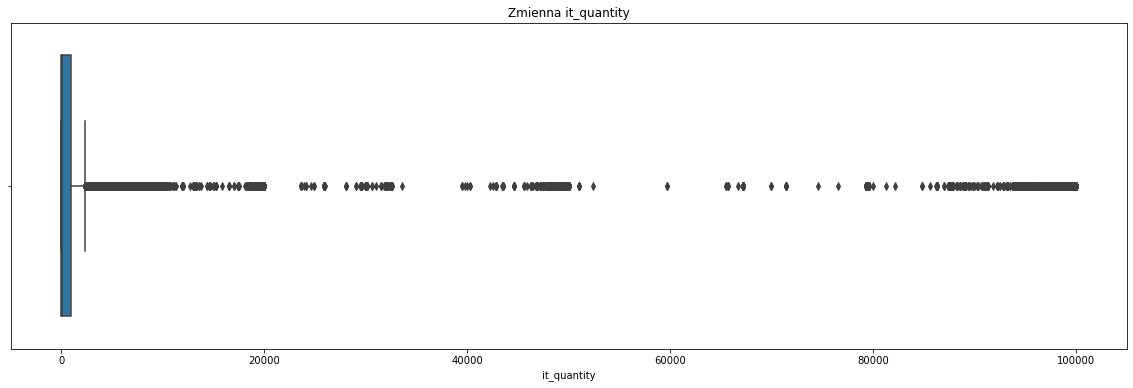

In [30]:
plt.figure(figsize=(20, 6))
box_plot = sns.boxplot(X_train['it_quantity'])
box_plot.set_title('Zmienna it_quantity')
plt.show()

In [31]:
X_train['it_quantity'].max()

99999

In [ ]:
# NIE WIEM JAK TU PODZIELIC

# Może tak? Zostawiam obie wersje

In [ ]:
# PIERWSZA WERSJA

Jako, że zmienna `it_quantity` mówi nam o tym, ile egzemplarzy danego produktu ktoś kupił, możemy podzielić go na następujące kategorie:

* 1: 1 egzemplarz
* 2: od 2 do 10 egzeplarzy
* 3: od 11 do 1000 egzemplarzy
* 4: od 1001 do 10000 egzemplarzy
* 5 od 10000 egzemplarzy

Gdzie pierwsze dwie opcje odpowiadają bardziej zakupom detalicznym, a dwie ostatnie hurtowym. W wyniku otrzymamy dosyć równomierny podział.

In [ ]:
#X_train['it_quantity'] = pd.cut(X_train['it_quantity'], bins=[-1, 1, 10, 100, 1000, 100000], labels=[1, 2, 3, 4, 5])

In [ ]:
#X_train['it_quantity'].value_counts()

In [ ]:
# DRUGI SPOSÓB

Podzielimy tę zmienną na 5 grup: 
* A: 0-19 999
* B: 20 000 - 39 999
* C: 40 000 - 59 999
* D: 60 000 - 79 999
* E: 80 000 - 100 000

In [ ]:
#X_train['it_quantity'] = pd.cut(X_train['it_quantity'], bins=[-1, 20000, 40000, 60000, 80000, 100000], labels=['A', 'B', 'C', 'D', 'E'])

In [ ]:
# TRZECI SPOSOB

Jako, że zmienna `it_quantity` mówi nam o tym, ile egzemplarzy danego produktu ktoś kupił, możemy podzielić go na 5 kategorii, które odpowiadają kwintylom: 

In [ ]:
X_train['it_quantity'] = pd.qcut(X_train['it_quantity'], 5, labels=[1, 2, 3, 4, 5])

##### it_seller_rating

In [ ]:
plt.figure(figsize=(20, 6))
box_plot = sns.boxplot(X_train['it_seller_rating'])
box_plot.set_title('Zmienna it_seller_rating')

In [ ]:
X_train["it_seller_rating"].describe()

In [ ]:
X_train[X_train.seller == "ezebra_pl"][['seller', 'it_seller_rating']]

Jako, że zmienna `it_seller_rating` mówi nam o ocenie sprzedającego. Jak widać na powyższej tabeli, dla jednego konretnego sprzedającego, rating nie zmienia się w ciągu dnia. Klienci oceniają sprzedawcę między transakcjami, ale ocena nie zmienia się drastycznie, dlatego prawdopodobnie i tak wpadnie do tej samej kategorii. 

In [ ]:
# INNY POMYSŁ:
# Można na początek zamienić ocenę dla każdego unikalnego sklepu średnią ratingów z dnia, aby później kategoryzacja była jednoznaczna.
# A może jednak nie zmieniać bo to trwa wieczność z taką ilością wartości :((
#X_train1 = X_train
#sellers = X_train1.seller.unique()[1:100]
#for sel in sellers:
#     X_train1[X_train1.seller == sel]['it_seller_rating'] = X_train1[X_train1.seller == sel]['it_seller_rating'].mean()

In [ ]:
# PIERWSZY SPOSÓB

Możemy teraz dokonać kategoryzacji zmienniej `it_seller_rating` na następujące grupy:

* 0 - 1000 - 1
* 10001 - 3000 - 2
* 3000 - 10000 - 3
* 10000 - 50000 - 4
* 50000 - 300000 - 5

In [ ]:
tmp = pd.cut(X_train['it_seller_rating'], bins=[-1, 1001, 3001, 10001, 50001, 300000], labels=[1,2,3,4,5])
tmp[tmp.isna()]

Przy kategoryzowaniu pojawiły się wartości `NaN`. Przyjrzyjmy się jakie wartości znajdowały się na tych pozycjach w oryginalnej ramce

In [ ]:
X_train.loc[79733, 'it_seller_rating']

Okazuje się, że w ramce występują rekordy, dla których ocena wynosi -1. Być może jest to związane z brakiem jakiejkolwiek oceny. Jako, że znajdują się tylko 4 takie rekordy w zbiorze testowym, możemy uznać, że sprzedawcy o takiej ocenie zaliczymy do najniższej grupy w kategoryzowaniu.

In [ ]:
X_train['it_seller_rating'] = pd.cut(X_train['it_seller_rating'], bins=[-2, 1001, 3001, 10001, 50001, 300000], labels=[1,2,3,4,5])

In [ ]:
X_train['it_seller_rating'].value_counts()

In [ ]:
# DRUGI SPOSÓB

Dane ciągłe z kolumny `it_seller_rating` możemy podzielić go na 5 kategorii, które odpowiadają kwintylom: 

In [ ]:
X_train['it_seller_rating'] = pd.qcut(X_train['it_seller_rating'], 5, labels=[1, 2, 3, 4, 5])

### `price`

In [ ]:
plt.figure(figsize=(20, 6))
box_plot = sns.boxplot(X_train['price'])
box_plot.set_title('Zmienna price')

Jeśli mamy podzielić zmienną *price* na 3 kategorie: cena wysoka, cena średnia oraz cena niska, to widać, że dane większe niż 10000 będą z pewnością zaliczać się do ostaniej grupy, ponieważ są to wartości odstające. 

In [ ]:
X_train['price'].describe()

In [ ]:
plt.figure(figsize=(20, 6))
tmp = X_train.loc[X_train['price'] < 400]
box_plot = sns.boxplot(tmp['price'])

In [ ]:
np.percentile(X_train['price'], 90)

In [ ]:
np.percentile(X_train['price'], 60)

In [ ]:
tmp = pd.cut(X_train['price'], bins=[0, 35, 150, np.inf], labels=['niska cena', 'średnia cena', 'wysoka cena'])

In [ ]:
# sprawdzamy czy przy takim podziale wstąpią jakieś braki dnaych
tmp[tmp.isna()]

In [ ]:
#sprawdzamy dlaczego wystapiły
X_train.loc[379219, 'price']

Nie wiadomo jak interpretować cenę wynoszącą 0, zatem ze względu na to, że wartości tych jest stosunkowo niewiele lepiej je usunąć.

In [ ]:
X_train = X_train[X_train.price != 0]

In [ ]:
#zmiana price na zmienną kategoryczną:
X_train['price'] = pd.cut(X_train['price'], bins=[0, 150, 1000, np.inf], labels=['niska cena', 'średnia cena', 'wysoka cena'])

In [ ]:
#Wersja z podziałem numerycznym
X_train['price'] = pd.cut(X_train['price'], bins=[0, 150, 1000, np.inf], labels=[1, 2, 3])

#### Kodowanie zmiennych kategorycznych

Jak wynika już z wcześniejszej analizy, zmienne `pay_option_on_delievery`, `pay_option_delievry`, `it_is_allegro_standar`, `it_is_brand_zone` są kategoryczne. Przyjrzyjmy się innym zmiennym.

Na pierwszy rzut oka wydaje się, że zmienne `categories` i `main_category` niosą podobną informację. 

In [ ]:
X_train['main_category'].value_counts()

In [ ]:
X_train.loc[X_train.main_category == "Motoryzacja"]['categories'].value_counts()

Okazuje się, że zmienna `categories` jest rozszerzeniem zmiennej `main_category`. Wydaje się, więc że ze względu na duże rozdrobnienie lepiej będzie usunąć zmienną `categories` i pozostawić bardziej ogólną zmienną. 

In [ ]:
X_train.drop('categories', axis = 1, inplace = True)

Dodatkowo, można popracować nad redukcją różnych kategorii w zmiennej `main_category`. Wydaje się, że niektóre kategorie dotyczą podobnych produktów, dzięki czemu możliwe jest ich scalenie. 
* Na początek do grupy 'RTV i AGD' dodamy też grupy 'telefony i akcesoria', 'Komputery', 'Konsole i automaty' i 'Sprzęt estradowy, studyjny i DJ-ski'.
* Kategorie 'Książki i komiksy', 'Gry', 'Rękodzieło', 'Kolekcje', 'Fotografia', 'Muzyka', 'Antyki i Sztuka', 'Filmy', 'Instrumenty' połączymy w jedną kategorię 'Rozrywka i sztuka'.
* Kategorię 'Biżuteria i `zegarki' dołączymy do kategorii 'Odzież, obuwie, dodatki'.
* Kategorię 'Uroda' i 'Zdrowie' połączymy w kategorię 'Uroda i zdrowie'
* Kategorie 'Delikatesy', 'Przemysł', 'Biuro i Reklama', 'Bilety' i 'Nieruchomości' połączymy w grupę "Przemysł i usługi"

In [ ]:
rtv = ['Komputery', 'Telefony i Akcesoria', 'Konsole i automaty', 'Sprzęt estradowy, studyjny i DJ-ski']
art = ['Książki i Komiksy', 'Gry', 'Rękodzieło', 'Kolekcje', 'Fotografia', 'Muzyka', 'Antyki i Sztuka', 'Filmy', 'Instrumenty']
ind = ['Delikatesy', 'Przemysł', 'Biuro i Reklama', 'Bilety', 'Nieruchomości']

X_train['main_category'] = X_train['main_category'].replace(rtv, 'RTV i AGD')
X_train['main_category'] = X_train['main_category'].replace(art,'Sztuka i Rozrywka')
X_train['main_category'] = X_train['main_category'].replace('Biżuteria i Zegarki','Odzież, Obuwie, Dodatki')
X_train['main_category'] = X_train['main_category'].replace(['Uroda', "Zdrowie"],'Uroda i Zdrowie')
X_train['main_category'] = X_train['main_category'].replace(ind,'Przemysł i usługi')

In [ ]:
X_train['main_category'].value_counts()

Jeśli już mamy wybrane kategorie to możemy teraz zakodować te zmienne przy pomocy one-hot-encoding.

In [ ]:
cat_df = pd.get_dummies(X_train['main_category'], prefix='cat_')
cat_df.shape

In [ ]:
X_train.shape

In [ ]:
#mają tyle samo wierszy więc łączenie obu ramek:
pd.concat([X_train.drop('main_category', axis=1, inplace = True), cat_df], axis=1)

#### `date`

Dane w naszej ramce pochodzą z jednego konretnego dnia, 3 kwietnia 2016 roku. Dlatego wydaje się, że można ze zmiennej `date` wyciągnąć informacje o godzinie i umieścić w zmiennej 'time' informującej o godzinie dokonania zakupu. Następnie można pogrupować uczynić zmienną 'type' kategoryczną dzieląc na 4 grupy:

* 0:00 - 6:00 - 1 jako 'noc'
* 6:00 - 12:00 - 2  jako 'ranek'
* 12:00 - 18:00 - 3 jako 'popołudnie'
* 18:00 - 24:00 - 4 jako 'wieczór'

Dodatkowo można pozbyć się kolumny 'date'.

In [27]:
X_train['date'] = pd.to_datetime(X_train['date'])
X_train['time'] = X_train['date'].apply(lambda x:x.time())
X_train['time'] = X_train['time'].apply(lambda x:x.hour)
X_train['time'] = pd.cut(X_train['time'], bins=[-1, 5, 11, 17, 24], labels=[1, 2, 3, 4])
X_train.drop('date', axis = 1, inplace = True)

In [ ]:
tmp = X_train.groupby(['it_location']).size().reset_index(name='counts').sort_values(by = 'counts', ascending=False)

In [28]:
X_train['it_location'].value_counts()

Warszawa                        11227
Kraków                           7514
Łódź                             5358
Poznań                           5174
Wrocław                          4245
                                ...  
Warszawa Anin ul.Mrówcza 214        1
piłka                               1
GLOBALNIE                           1
ĆMIELÓW                             1
Dziekanow Polski                    1
Name: it_location, Length: 7970, dtype: int64

In [ ]:
tmp[tmp.counts > 1000]

### Komentarz od autora

Nie mam bladego pojęcia co zrobić z tymi location i seller. Czy upakować jakieś kategorie które nie przekraczają progu do others czy jakoś wybierać? ale to jest tyle róznych wartości. A jeszcze te nazwy miast są takie jak widać - dramat. :(


#### `seller`

Każdy sklep ma wstawioną oceną, którą już skategoryzowaliśmy, dlatego nazwa sklepu już nic nie wnosi, dlatego ją usuwamy.

In [ ]:
X_train.drop('seller', inplace = True, axis = 1)

Na koniec, aby w ramce mieć jedynie zmienne numeryczne, użyjemy `LabelEncoder`, aby zakodować dzieki temu pozostałe zmienne tesktowe.

#### `location`

In [ ]:
from sklearn.preprocessing import LabelEncoder
labelencoder_X = LabelEncoder()
X_train['main_category'] = labelencoder_X.fit_transform(X_train['main_category'])
X_train['it_location'] = labelencoder_X.fit_transform(X_train['it_location'])

In [ ]:
X_train.head(10)

#### Zmiany w zbiorze testowym

Przeprowadzimy teraz zmiany w zbiorze testowym

In [ ]:
X_test['it_quantity'] = pd.cut(X_test['it_quantity'], bins=[-1, 1, 10, 100, 1000, 100000], labels=[1, 2, 3, 4, 5])
X_test['it_seller_rating'] = pd.cut(X_test['it_seller_rating'], bins=[-2, 1001, 3001, 10001, 50001, 300000], labels=[1,2,3,4,5])
X_test = X_test[X_test.price != 0]
X_test['price'] = pd.cut(X_test['price'], bins=[0, 150, 1000, np.inf], labels=[1, 2, 3])

In [ ]:
X_test.drop('categories', axis = 1, inplace = True)

X_test['main_category'] = X_test['main_category'].replace(rtv, 'RTV i AGD')
X_test['main_category'] = X_test['main_category'].replace(art,'Sztuka i Rozrywka')
X_test['main_category'] = X_test['main_category'].replace('Biżuteria i Zegarki','Odzież, Obuwie, Dodatki')
X_test['main_category'] = X_test['main_category'].replace(['Uroda', "Zdrowie"],'Uroda i Zdrowie')
X_test['main_category'] = X_test['main_category'].replace(ind,'Przemysł i usługi')

In [ ]:
X_test['date'] = pd.to_datetime(X_test['date'])
X_test['time'] = X_test['date'].apply(lambda x:x.time())
X_test['time'] = X_test['time'].apply(lambda x:x.hour)
X_test['time'] = pd.cut(X_test['time'], bins=[-1, 5, 11, 17, 24], labels=[1, 2, 3, 4])
X_test.drop('date', axis = 1, inplace = True)

In [ ]:
X_test.drop('seller', inplace = True, axis = 1)
from sklearn.preprocessing import LabelEncoder
labelencoder_X = LabelEncoder()
X_test['main_category'] = labelencoder_X.fit_transform(X_test['main_category'])
X_test['it_location'] = labelencoder_X.fit_transform(X_test['it_location'])

In [ ]:
X_test.head()

### Wstępne modele (XDXD) 

Ja jestem jakimś debilem ogólnie, no ale robię jak w przykładzie, proszę być wyrozumiałym :')

Przetestujemy teraz kilka modeli na danych treningowych, a następnie na naszym zbiorze testowym.

In [ ]:
#Wyciągnięcie zmiennej przewidywanej ze zbiorów
y_train = np.array(X_train['price'])
X_train = X_train.drop(['price'],axis=1)
y_test = np.array(X_test['price'])
X_test = X_test.drop(['price'],axis=1)

Na początek użyjemy regresji logistycznej z parametrem `multi_class` ustawionym na 'multinomial', gdyż dokonujemy przewidujemy jedną z 3 klas ceny. 

In [ ]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(max_iter=100, multi_class = 'multinomial')

lr.fit(X_train, y_train)
y_hat = lr.predict(X_train)
print('y:     ' + str(y_hat[0:20]) + '\ny_hat: ' + str(y_train[0:20]))

In [ ]:
from sklearn.metrics import accuracy_score
accuracy_score(y_train, y_hat)

In [ ]:
y_hat = lr.predict(X_test)
accuracy_score(y_test, y_hat)

In [ ]:
#Nie wiem jak to interpretować
lr.coef_
lr.intercept_

No w sumie spoko wynik, lol. Wskaźnik dokładności na poziomie 89% bardzo dobry a przynajmniej tak myślę.

Teraz wykorzystamy model drzewa decyzyjnego.

In [ ]:
from sklearn.tree import DecisionTreeClassifier #, plot_tree, export_text, export_graphviz

tree = DecisionTreeClassifier()

tree.fit(X_train, y_train)
y_hat = tree1.predict(X_train)
print('y:     ' + str(y_hat[0:20]) + '\ny_hat: ' + str(y_train[0:20]))

In [ ]:
accuracy_score(y_train, y_hat)

In [ ]:
y_hat = tree.predict(X_test)
print('y:     ' + str(y_hat[0:20]) + '\ny_hat: ' + str(y_test[0:20]))

In [ ]:
accuracy_score(y_test, y_hat)

Dla zbioru testowego dokładność predykcji na poziomie 1. To nie jest dobry znak, najwyraźniej nasz model drzewiasty jest przetrenowany lub próbka do treningu nie została dobrze podzielona.